# Good for large datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

### Reading dataset

In [2]:
iris = load_iris()

### Preparing dataset

In [3]:
dataset = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [4]:
dataset['target'] = iris.target

In [5]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Dividing our dataset into dependent and independent features

In [6]:
X = dataset.iloc[:, :-1] # Independent features
y = dataset.iloc[:, -1] # Dependent feature

In [7]:
X.shape, y.shape

((150, 4), (150,))

### Splitting the dataset in train and test datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [9]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [10]:
X_test.shape, y_test.shape

((30, 4), (30,))

### Scaling the data: Scaling data for decision tree is not required as it don't effect the convergence of the algorithm.

### Pre-pruning and hyperparameter tuning using GridSearchCV

In [17]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['random', 'best'],
    'max_depth' : [1, 2, 3, 4, 5],
    'max_features' : ['sqrt', 'log2']
}

In [28]:
classifier = DecisionTreeClassifier()
grid_search_cv_clf = GridSearchCV(classifier, param_grid = parameters, cv = 5, scoring = 'accuracy')

In [29]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [30]:
grid_search_cv_clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [31]:
decision_tree_classifier = grid_search_cv_clf.best_estimator_

### Visualizing the decision tree

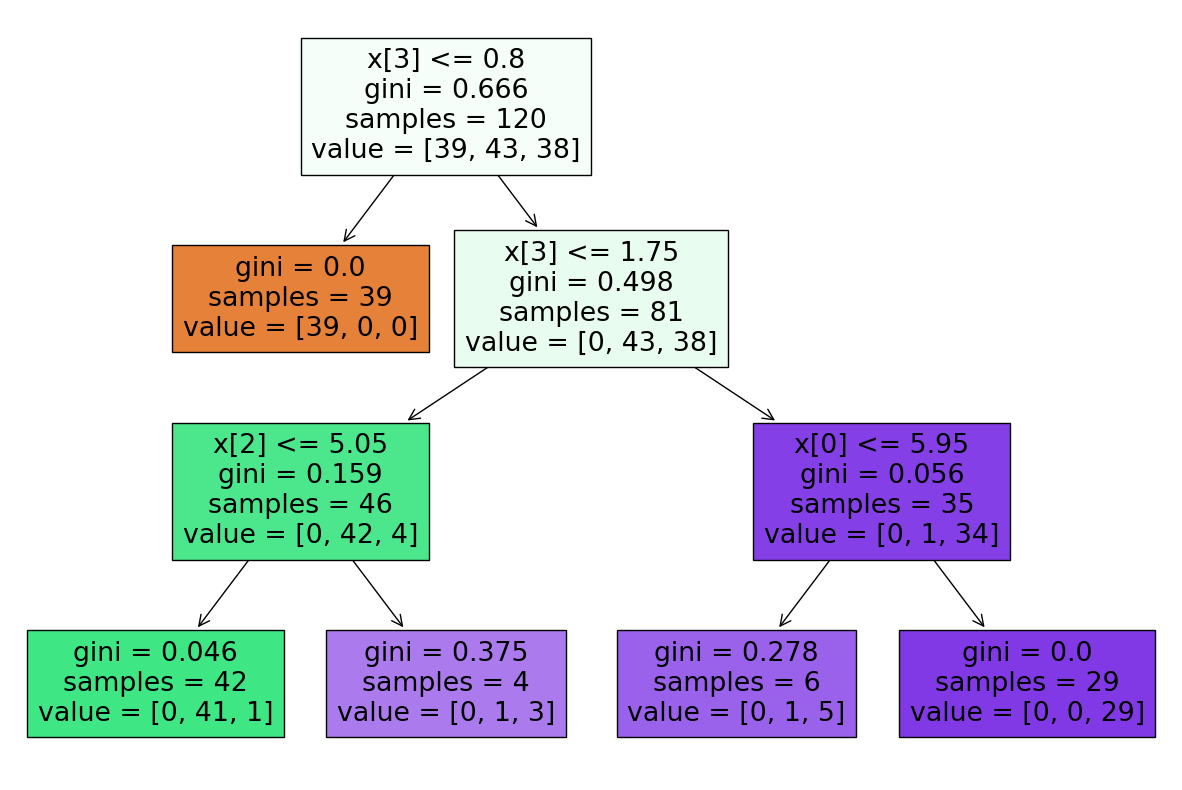

In [32]:
plt.figure(figsize = (15, 10))
plot_tree(decision_tree_classifier, filled = True)
plt.show()

### Prediction

In [33]:
y_pred_test = decision_tree_classifier.predict(X_test)

### Confusion Matrix, Accuraccy Score, Classification Report

In [34]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]


In [35]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))

Accuracy Score:  0.9666666666666667


In [36]:
print("------------------Classification Report------------------\n", classification_report(y_test, y_pred_test))

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

